In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from distort_image_ import distort_image
from hopfield_net import HopfieldNetwork
path ="../dataset/lab2_2_data"

In [2]:
im=[]
for i in range(3):    
    im.append( pd.read_csv(path + f"/p{i}.csv", header=None))
    im[i]=np.array(im[i])
    im[i]=im[i].reshape(32,32).T



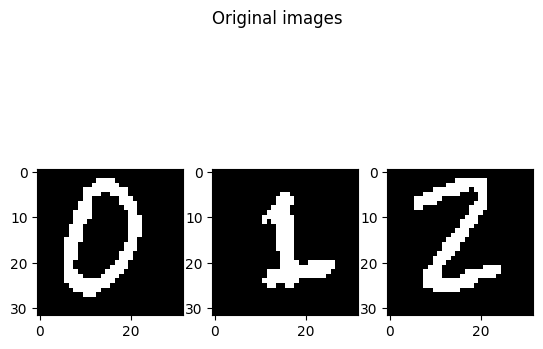

In [3]:
fig, axs = plt.subplots(1,3)

for i, ax in enumerate(axs):
    ax.imshow(im[i], cmap='gray')

plt.suptitle('Original images')
plt.show()

In [4]:
images =np.array(im)
images = images.reshape(3,-1)

## Training the Network
Training the hopfield network is as simple as initializing it and calling the method `hopfield.training(images)`

In [5]:
hopfield= HopfieldNetwork()
hopfield.training(images)

## 5% of distorsion

Let's start first with 5% of distorsion. I expect pretty good results from the retrieving.

To retrieve the images, we must pass the distorted images, and, optionally, select the number of steps and the bias.
If we want to compute retrieving history (energy and overlap during epochs) we must also provide the original image.

In [7]:
def retrieve_and_plot(orig, digit, noise_level, **hopfield_kwargs):
    """
    Retrieve and plot a distorted image and the retrieved image.
    """
    # generate distorted image
    dist_img = distort_image(orig, noise_level)
    dist_img = dist_img.reshape(-1, 1)
    # retrieve image
    retrieved = hopfield.retrieval(dist_img, **hopfield_kwargs, compute_history=True, orig=orig)
    overlap = hopfield.history['overlap']
    # plot images
    fig, axes = plt.subplots(1, 3)
    axes[0].imshow(dist_img.reshape(32, 32), cmap='gray')
    axes[0].set_title('distorted image')
    axes[1].imshow(retrieved.reshape(32, 32), cmap='gray')
    axes[1].set_title('retrieved image')
    axes[2].imshow(orig.reshape(32, 32), cmap='gray')
    axes[2].set_title('original image')
    plt.suptitle(f'Distorted image ({digit}) with {int(noise_level*100)}% noise')
    plt.savefig(f'images/retrieval_{digit}_{noise_level}.png')
    plt.show()
    # save image
    hopfield.plot_energy(title=f'Energy of distorted image ({digit}) with {int(noise_level*100)}% noise')
    plt.savefig(f'images/energy_{digit}_{noise_level}.png')
    plt.show()
    return overlap

converged in 2 steps


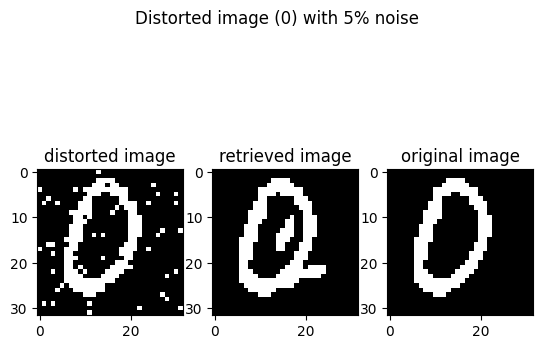

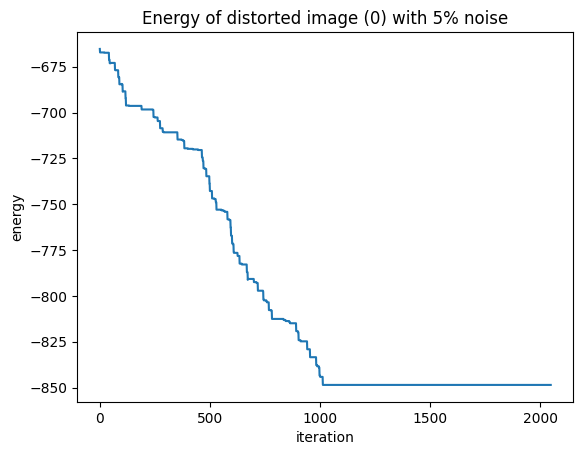

In [8]:
overlap_0 = retrieve_and_plot(images[0], 0, 0.05, max_steps=10, bias = 0.6)

The retrieved 0 image seems a bit entangled with the 2. Changing the bias magnitude does not seem to produce any significant effects.
The digit is clearly arrived at the equilibrium, as we see from the graph.

Let's try with the 1 and the 2.

converged in 2 steps


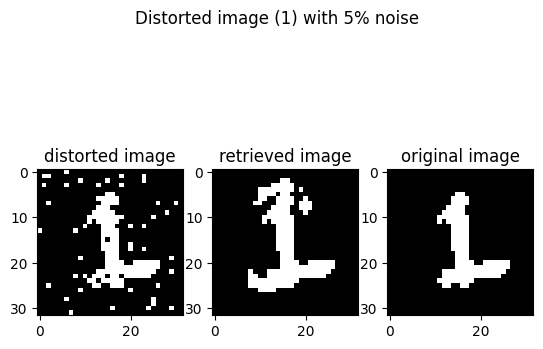

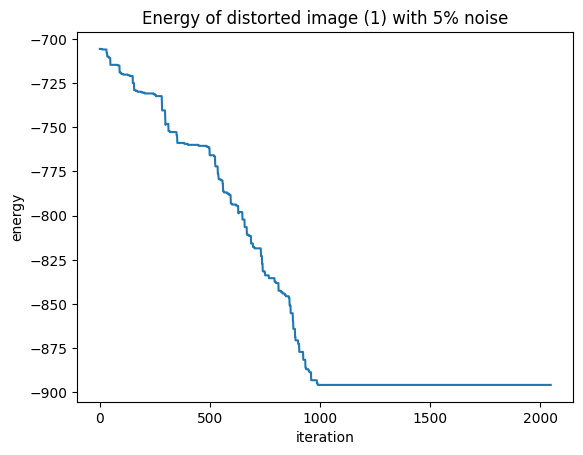

In [9]:
overlap_1 = retrieve_and_plot(images[1], 1, 0.05, max_steps=10, bias = 0.6)

converged in 2 steps


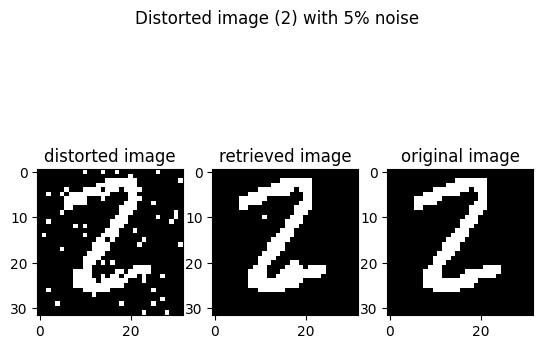

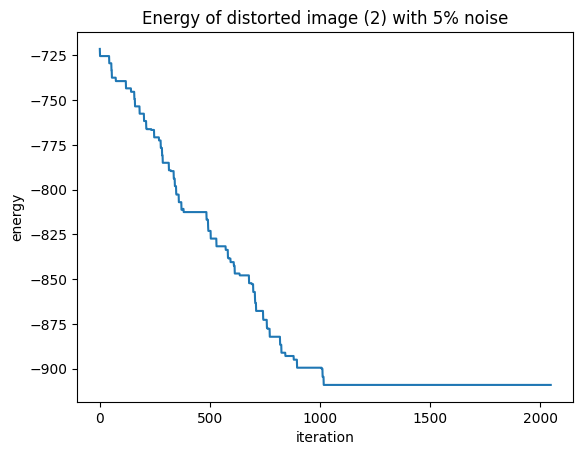

In [10]:
overlap_2 = retrieve_and_plot(images[2], 2, 0.05, max_steps=10, bias = 0.6)

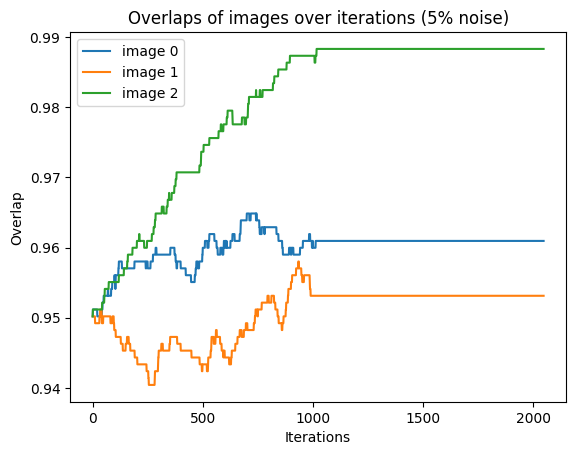

In [11]:
# plot overlaps
fig, ax = plt.subplots()
ax.plot(overlap_0, label='image 0')
ax.plot(overlap_1, label='image 1')
ax.plot(overlap_2, label='image 2')
ax.set_xlabel('Iterations')
ax.set_ylabel('Overlap')
ax.set_title('Overlaps of images over iterations (5% noise)')
ax.legend()
plt.savefig(f'images/overlaps{0.5}.png')
plt.show()

As we can see both visually and from the overlap plot, 2 is the image that is retrieved best, with an accuracy of almost 99%. 1 is the worst retrieved digit, not reaching 96% overlap. Visually, I think that 0 is the digit that suffers the most from the mixing of equilibria.

## 10% of noise

Now we repeat the experiment with a 10% of noise

converged in 2 steps


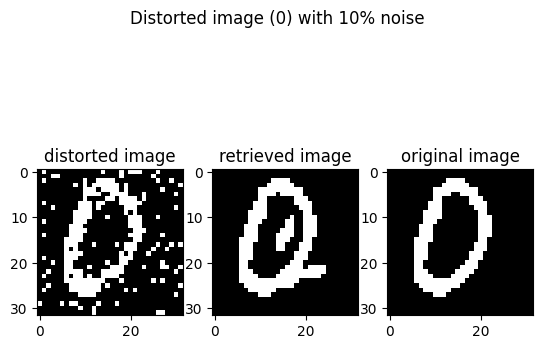

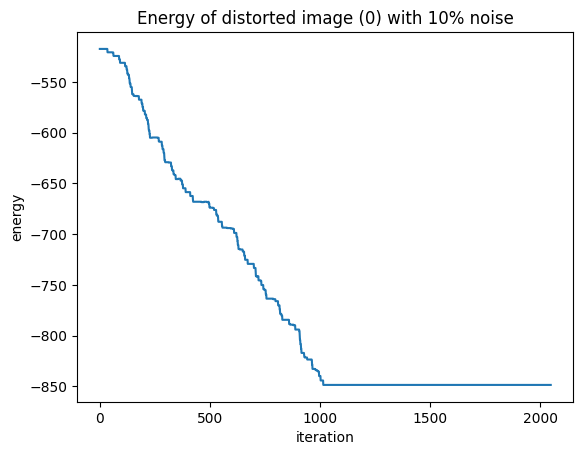

In [12]:
overlap_0 = retrieve_and_plot(images[0], 0, 0.1, max_steps=10, bias = 0.6)

As we can see, the fixed point reached by 0 is exactly the same.

converged in 2 steps


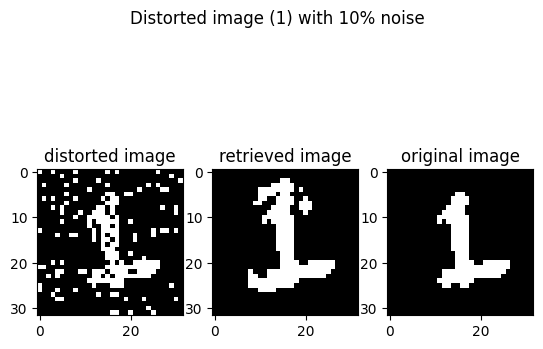

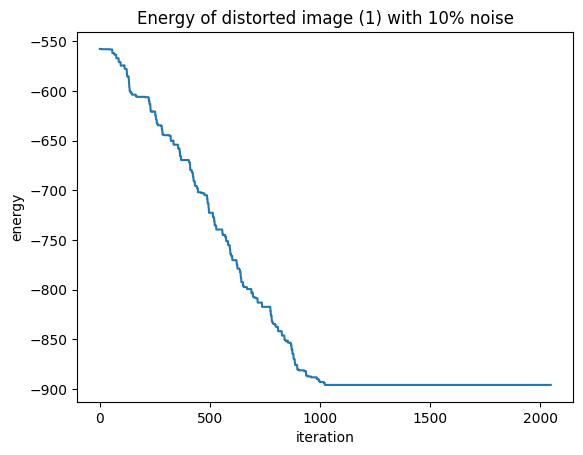

In [13]:
overlap_1 = retrieve_and_plot(images[1], 1, 0.1, max_steps=10, bias = 0.6)

converged in 2 steps


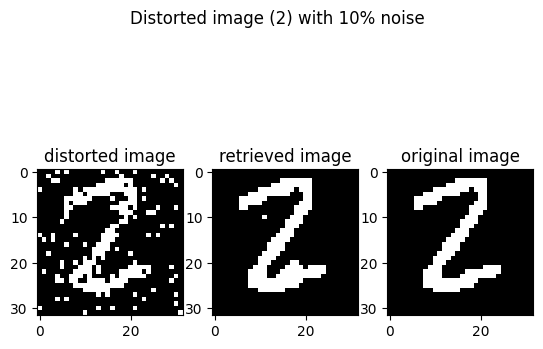

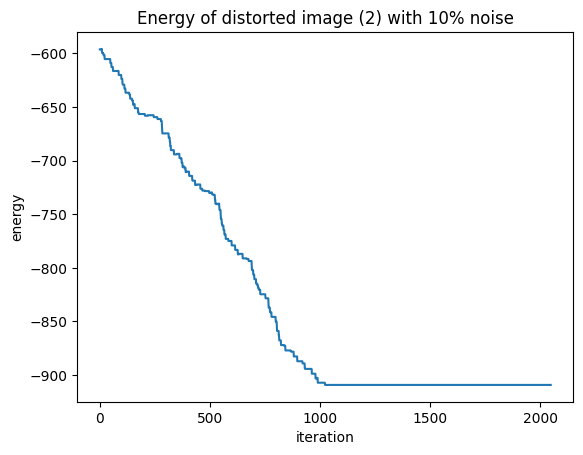

In [14]:
overlap_2 = retrieve_and_plot(images[2], 2, 0.1, max_steps=10, bias = 0.6)


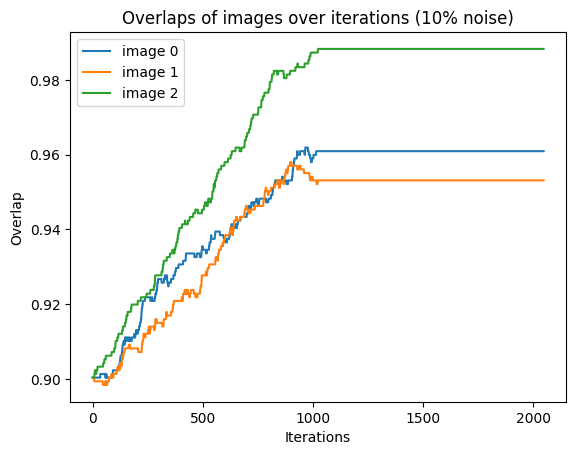

In [15]:
fig, ax = plt.subplots()
ax.plot(overlap_0, label='image 0')
ax.plot(overlap_1, label='image 1')
ax.plot(overlap_2, label='image 2')
ax.set_xlabel('Iterations')
ax.set_ylabel('Overlap')
ax.set_title(f'Overlaps of images over iterations (10% noise)')
ax.legend()
plt.savefig(f'images/overlaps{0.1}.png')
plt.show()

## 25% of noise

converged in 3 steps


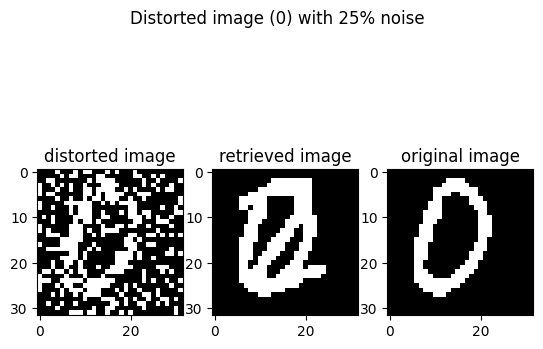

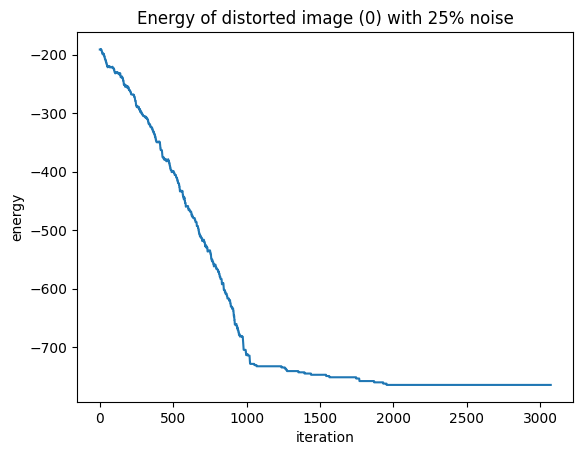

In [16]:
overlap_0 = retrieve_and_plot(images[0], 0, 0.25, max_steps=10, bias = 0.6)

converged in 3 steps


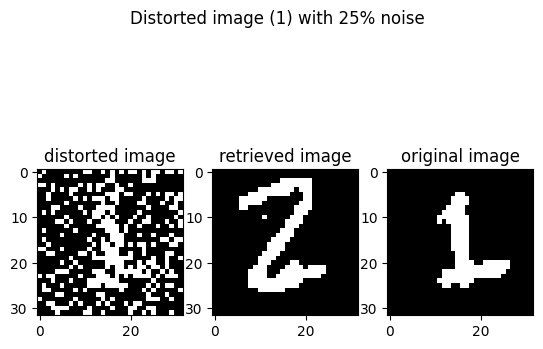

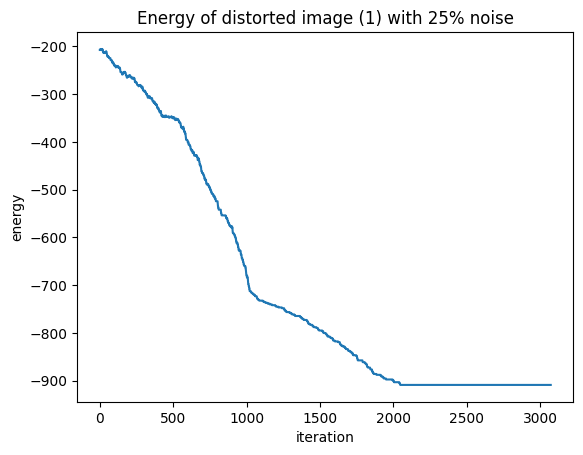

In [17]:
overlap_1 = retrieve_and_plot(images[1], 1, 0.25, max_steps=10, bias = 0.6)

converged in 3 steps


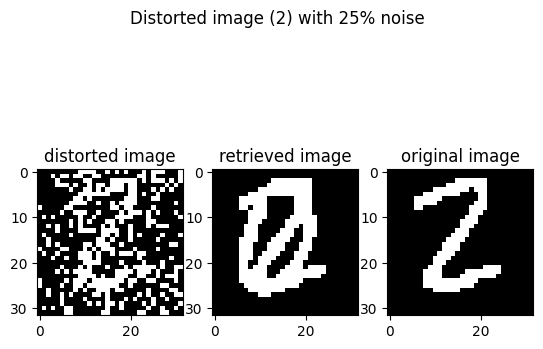

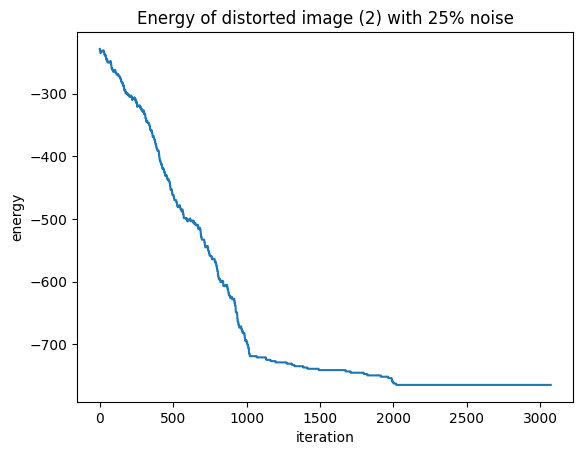

In [18]:
overlap_2 = retrieve_and_plot(images[2], 2, 0.25, max_steps=10, bias = 0.6)

As we can see, with this noise rate, all the digits converge to a mix of all digits. This result in a overlap rate of almost 90% for all three digits.

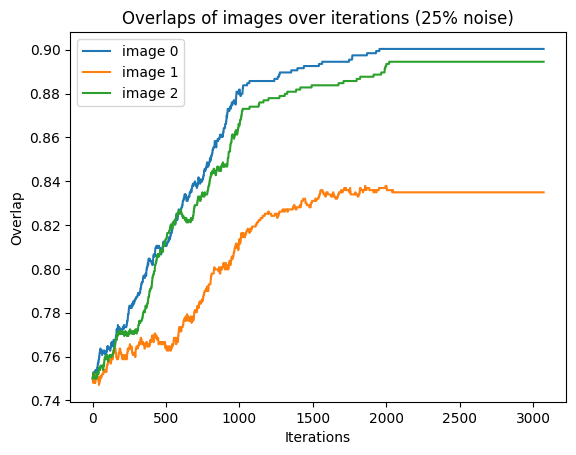

In [19]:
fig, ax = plt.subplots()
ax.plot(overlap_0, label='image 0')
ax.plot(overlap_1, label='image 1')
ax.plot(overlap_2, label='image 2')
ax.set_xlabel('Iterations')
ax.set_ylabel('Overlap')
ax.set_title('Overlaps of images over iterations (25% noise)')
ax.legend()
plt.savefig(f'images/overlaps{0.25}.png')
plt.show()

## All digits

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from distort_image_ import distort_image
from hopfield_net import HopfieldNetwork


In [21]:
path ="../dataset/lab2_2_alldigits"

In [22]:
im =[]
for i in range(10):
    im.append( pd.read_csv(path + f"/p{i}.csv", header=None))
    im[i]=np.array(im[i])
    im[i]=im[i].reshape(32,32).T

all_digits =np.array(im)

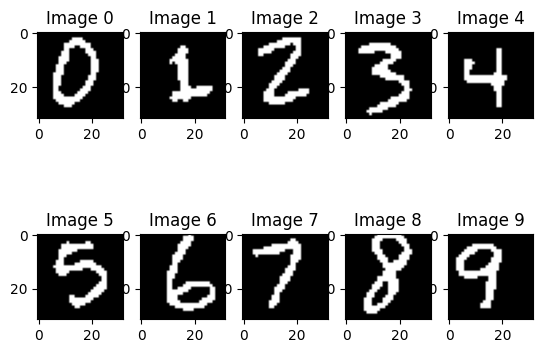

In [23]:
fig, axs = plt.subplots(2,5)
for i, ax in enumerate(axs.flat):
    ax.imshow(im[i], cmap='gray')
    ax.set_title(f'Image {i}')

In [24]:
all_digits = all_digits.reshape(10,-1)

In [25]:
hopfield_all = HopfieldNetwork()
hopfield_all.training(all_digits)

In [26]:
distorted =[]
retrieved_images =[]
for i in range(10):
    im[i]=im[i].reshape(-1,1)
    im_dist= distort_image(im[i], 0.05)
    distorted.append(im_dist)
    im_dist = im_dist.reshape(-1,1)
    retrieved = hopfield_all.retrieval(im_dist, max_steps=10, bias=0, compute_history=False)
    retrieved_images.append(retrieved)


converged in 5 steps
converged in 4 steps
converged in 4 steps
converged in 3 steps
converged in 4 steps
converged in 3 steps
converged in 4 steps
converged in 5 steps
converged in 4 steps
converged in 3 steps


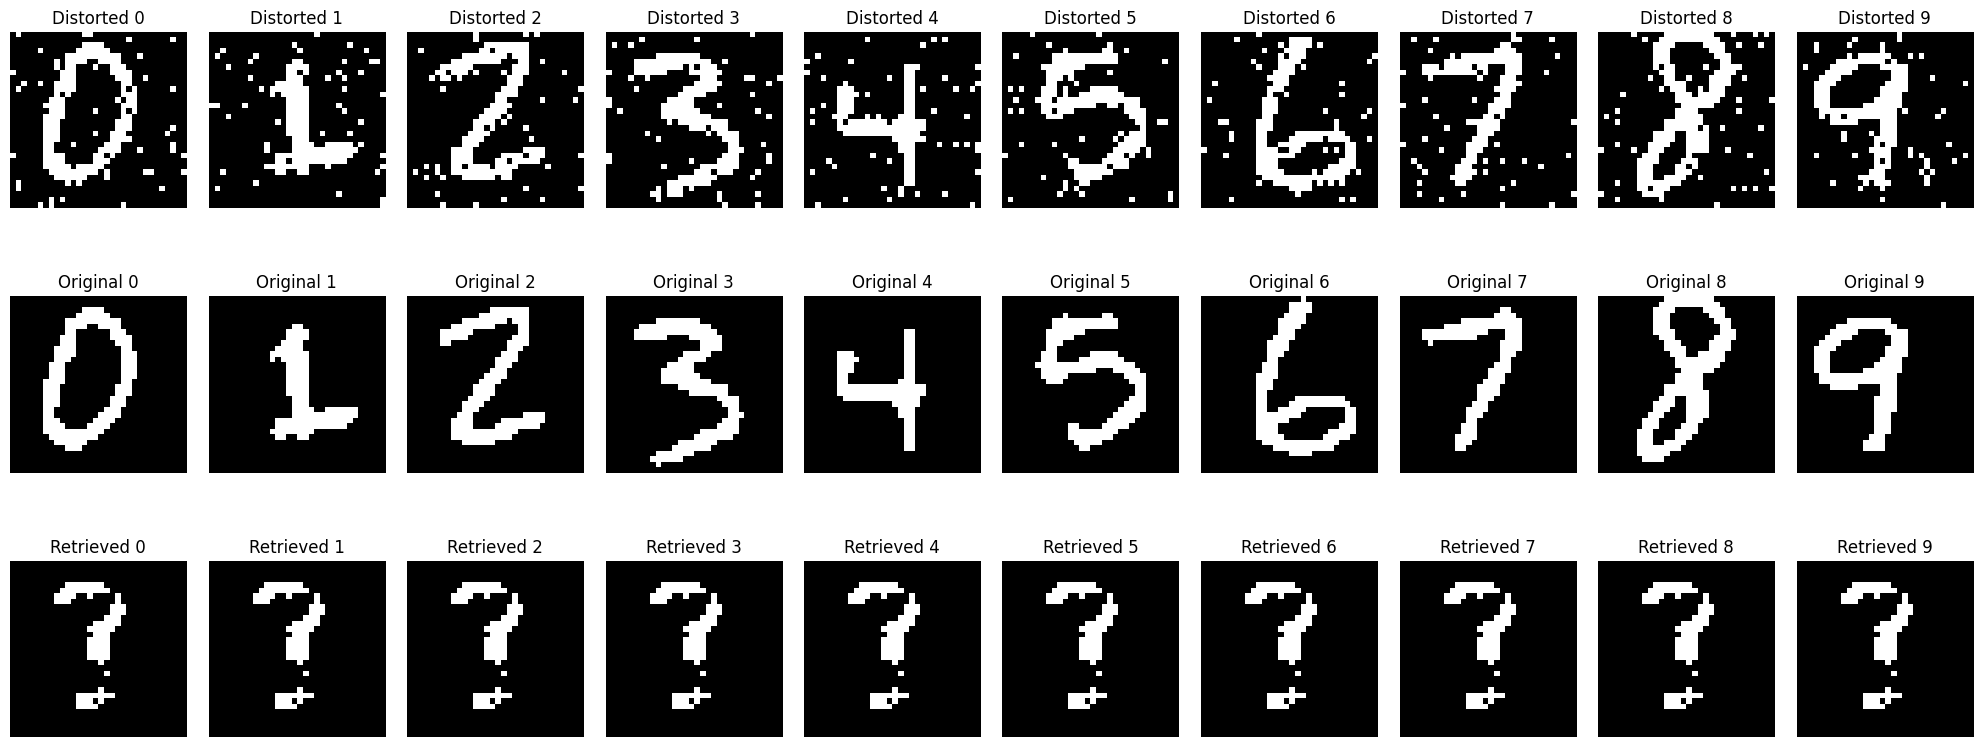

In [27]:
import matplotlib.pyplot as plt

# Increase the figure size
fig, axs = plt.subplots(3, 10, figsize=(20, 8))

for i in range(10):
    axs[0, i].imshow(distorted[i].reshape(32, 32), cmap='gray')
    axs[1, i].imshow(all_digits[i].reshape(32, 32), cmap='gray')
    axs[2, i].imshow(retrieved_images[i].reshape(32, 32), cmap='gray')
    
    axs[0, i].set_title(f'Distorted {i}')
    axs[1, i].set_title(f'Original {i}')
    axs[2, i].set_title(f'Retrieved {i}')
    
    axs[0, i].axis('off')
    axs[1, i].axis('off')
    axs[2, i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()


Well... seems that even the network doesn't know what to do, since it always outputs a "?"